In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

dir_path = []
for dirname, _, filenames in os.walk('/kaggle/input/bbc-full-text-document-classification/bbc'):
    dir_path.append(dirname)

dir_path

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['/kaggle/input/bbc-full-text-document-classification/bbc',
 '/kaggle/input/bbc-full-text-document-classification/bbc/politics',
 '/kaggle/input/bbc-full-text-document-classification/bbc/sport',
 '/kaggle/input/bbc-full-text-document-classification/bbc/tech',
 '/kaggle/input/bbc-full-text-document-classification/bbc/entertainment',
 '/kaggle/input/bbc-full-text-document-classification/bbc/business']

# Text files to CSV

Data has 5 subfolders which are actually the labels of the news. They are politics, sports, tech, entertainment and business news. Each of these subfolders contains several news in the form of .txt files.

For easy use, I define following function to read all of these files along with their category and convert them to a single pandas CSV data frame.

In [2]:
import glob
import io
import warnings
warnings.filterwarnings("ignore")

def text_to_pandasDF(path):
    df = pd.DataFrame(columns=['news', 'class'])
    txt = []
    label = []
    
    for dirpath in path:
        text_files_path = sorted(glob.glob(os.path.join(dirpath, '*.txt')))
        
        for text_path in text_files_path:
            with io.open(text_path, 'r', encoding='utf-8', errors='ignore') as txt_file:
                txt.append(txt_file.read())
                label.append(dirpath.split('/')[-1])

    df['news'] = txt
    df['class'] = label
    txt, label = [], []
    
    return df

In [3]:
df = text_to_pandasDF(dir_path[1:])
df

,news,class
0,Labour plans maternity pay rise\n\nMaternity p...,politics
1,Watchdog probes e-mail deletions\n\nThe inform...,politics
2,Hewitt decries 'career sexism'\n\nPlans to ext...,politics
3,Labour chooses Manchester\n\nThe Labour Party ...,politics
4,Brown ally rejects Budget spree\n\nChancellor ...,politics
...,...,...
2220,Trial begins of Spain's top banker\n\nThe tria...,business
2221,UK economy ends year with spurt\n\nThe UK econ...,business
2222,HealthSouth ex-boss goes on trial\n\nThe forme...,business
2223,Euro firms miss out on optimism\n\nMore than 9...,business


Let's plot histogram of each class to check whether the data is unbalanced or not:

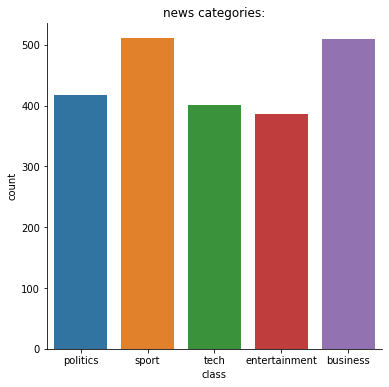

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
plt.title("news categories:")
sns.countplot(x=df["class"])
sns.despine(top=True, right=True, left=False, bottom=False)

As you can see, the data is balanced; let's continue

# Data Preprocessing

As for the data has 5 classes, we should use one-hot encoding to transform label of classes. After that, we can split data to train and test sets.

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X = df['news']

#label one_hot encoding
y = np.array(df['class'])
y = np.reshape(y, (-1,1))
y = OneHotEncoder().fit_transform(y).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

in this notebook we are goin to use BERT;

BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture. For more information and how to use it, check this documentation:

[https://tfhub.dev/google/collections/bert/1](http://)

BERT uses its own preprocessing, which requires tensorflow_text to be installed. So let's intall it:

In [6]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 27.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 62.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing i

In [7]:
import tensorflow_hub as hub
import tensorflow_text as text

2023-01-06 15:50:39.409654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 15:50:40.637278: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-01-06 15:50:40.637511: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Co

In [8]:
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
model_preprocessing_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

preprocessor = hub.KerasLayer(model_preprocessing_url)
encoder = hub.KerasLayer(model_url)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model

#BERT Layers
input_layer = Input(shape=(), dtype=tf.string)
preprocess_layer = preprocessor(input_layer)
bert_output = encoder(preprocess_layer)

#Fully connected layers
z = Dropout(0.1)(bert_output['pooled_output'])
z = Dense(5, activation='softmax')(z)

model = Model(inputs=input_layer, outputs=z)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['input_1[0][0]']                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [10]:
model_history = model.fit(x=X_train,
                          y=y_train,
                          batch_size=32,
                          validation_split=0.2, 
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)],
                          epochs=30)

Epoch 1/30


2023-01-06 15:51:16.070170: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-06 15:51:16.270037: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


45/45 [==============================] - 30s 433ms/step - loss: 1.5536 - accuracy: 0.3343 - val_loss: 1.3825 - val_accuracy: 0.4803
Epoch 2/30
45/45 [==============================] - 20s 452ms/step - loss: 1.3027 - accuracy: 0.4853 - val_loss: 1.1577 - val_accuracy: 0.5955
Epoch 3/30
45/45 [==============================] - 19s 432ms/step - loss: 1.1381 - accuracy: 0.5801 - val_loss: 1.0790 - val_accuracy: 0.5197
Epoch 4/30
45/45 [==============================] - 19s 426ms/step - loss: 1.0299 - accuracy: 0.6608 - val_loss: 0.9456 - val_accuracy: 0.6994
Epoch 5/30
45/45 [==============================] - 20s 441ms/step - loss: 0.9425 - accuracy: 0.7177 - val_loss: 0.9025 - val_accuracy: 0.7388
Epoch 6/30
45/45 [==============================] - 21s 464ms/step - loss: 0.8921 - accuracy: 0.7275 - val_loss: 0.8300 - val_accuracy: 0.7753
Epoch 7/30
45/45 [==============================] - 21s 459ms/step - loss: 0.8076 - accuracy: 0.7647 - val_loss: 0.7925 - val_accuracy: 0.7753
Epoch 8/30

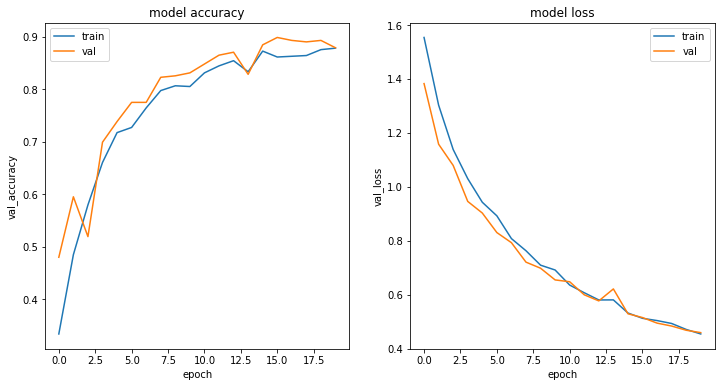

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax[0].plot(model_history.history['accuracy'])
ax[0].plot(model_history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('val_accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='upper left')

ax[1].plot(model_history.history['loss'])
ax[1].plot(model_history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('val_loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper right')

fig.show()

# Model Testing

14/14 [==============================] - 6s 357ms/step


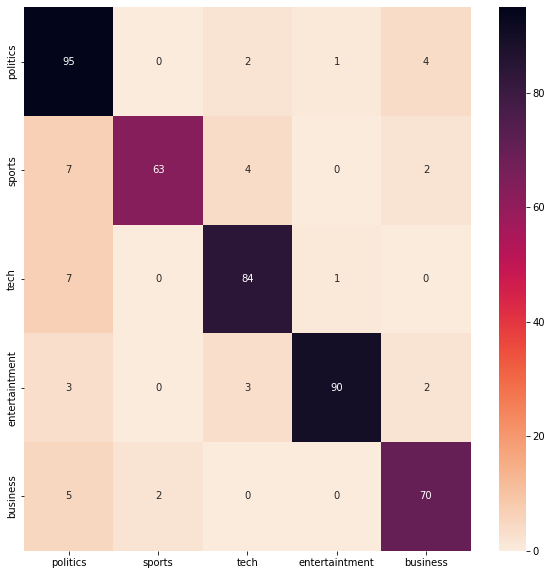

In [12]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(10,10))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['politics', 'sports', 'tech', 'entertaintment', 'business'], yticklabels = ['politics', 'sports', 'tech', 'entertaintment', 'business'])